# 공공데이터 분석
https://www.data.go.kr/data/15010850/fileData.do

# 가설
- 도시 지역에 버스정류장이 더 많을 것이다.
- 서귀포시보다 제주시에 버스정류장이 더 많을 것이다. (제주시인 경우 정류소ID가 40500XXXX, 서귀포시인 경우 40600XXXX인듯 함)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


set_matplotlib_formats('retina')

%matplotlib inline

In [3]:
df = pd.read_csv("제주특별자치도_버스정류소현황_20170831.csv", encoding="cp949")
df.shape

(3346, 6)

In [4]:
df.head()

,정류소ID,정류소명,경도,위도,위치정보(주변설명),데이터기준일자
0,406000324,(구)중앙파출소,126.560894,33.247598,윤성현내과의원 건너편,2017-08-31
1,406000467,(구)중앙파출소,126.560367,33.247000,M-STAY제주호텔 앞,2017-08-31
2,406001176,(구)중앙파출소,126.560890,33.247515,에이스모텔(후문) 앞,2017-08-31
3,406001109,1100고지휴게소,126.463076,33.357816,1100고지휴게소 맞은편,2017-08-31
4,405001361,1100고지휴게소,126.462945,33.357826,1100고지휴게소주차장 좌측끝,2017-08-31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   정류소ID       3346 non-null   int64  
 1   정류소명        3346 non-null   object 
 2   경도          3346 non-null   float64
 3   위도          3346 non-null   float64
 4   위치정보(주변설명)  3346 non-null   object 
 5   데이터기준일자     3346 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 157.0+ KB


In [6]:
df.columns

Index(['정류소ID', '정류소명', '경도', '위도', '위치정보(주변설명)', '데이터기준일자'], dtype='object')

In [7]:
df.dtypes

정류소ID           int64
정류소명           object
경도            float64
위도            float64
위치정보(주변설명)     object
데이터기준일자        object
dtype: object

In [8]:
df.isnull().sum()

정류소ID         0
정류소명          0
경도            0
위도            0
위치정보(주변설명)    0
데이터기준일자       0
dtype: int64

In [9]:
df["경도"].mean()

126.53476462731619

In [10]:
df["위도"].mean()

33.391264772863124

In [11]:
df.describe()

,정류소ID,경도,위도
count,3.346000e+03,3346.000000,3346.000000
mean,4.054328e+08,126.534765,33.391265
std,4.952889e+05,0.184370,0.103057
min,4.050000e+08,126.165039,33.208351
25%,4.050010e+08,126.405723,33.284083
50%,4.050019e+08,126.534621,33.419340
75%,4.060007e+08,126.661151,33.487150
max,4.060016e+08,126.935188,33.556167


## 가설 1

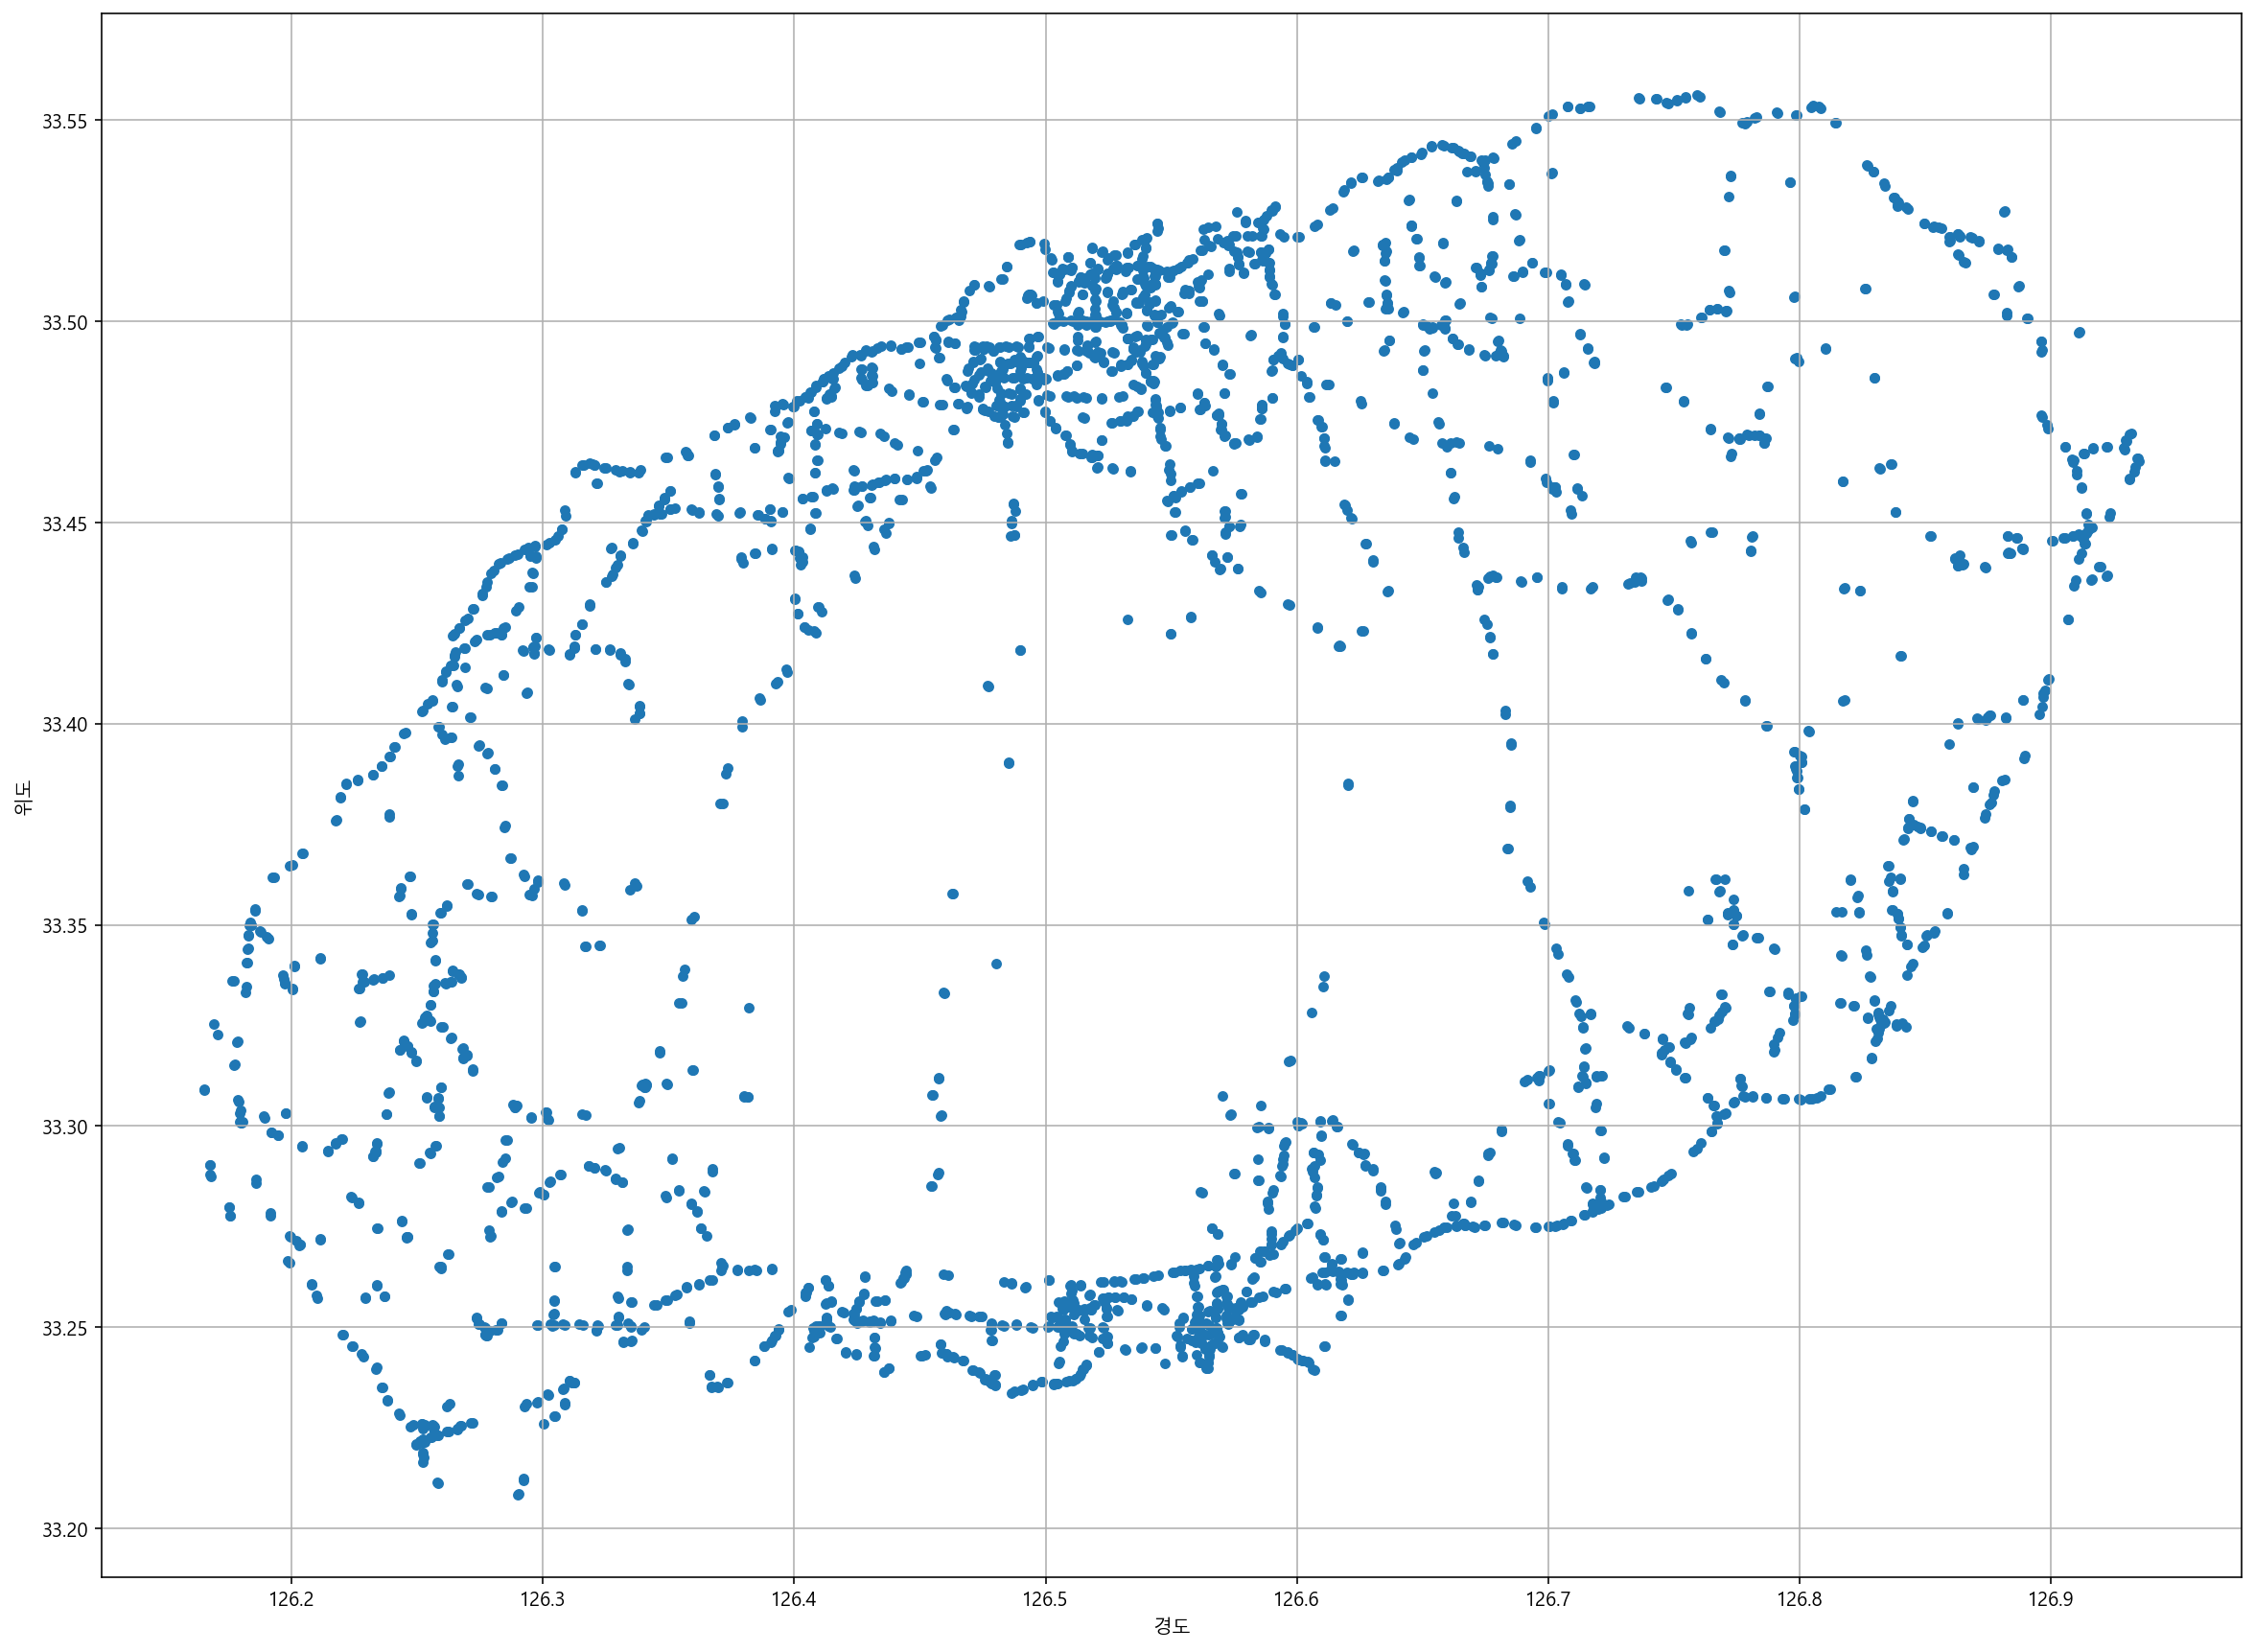

In [12]:
df[["경도", "위도"]].plot.scatter(x="경도", y="위도", figsize=(20, 15), grid=True)

### Scatter로 나타낸 결과 도시 지역에 정류장들이 많은 것을 확인할 수 있다.

## 가설 2

In [13]:
df1 = df.copy()  # 깊은 복사
df1["지역구분"] = ["제주시" if i < 406000000 else "서귀포시" for i in list(df1["정류소ID"])]  # 새로운 열 추가
df1.head()

,정류소ID,정류소명,경도,위도,위치정보(주변설명),데이터기준일자,지역구분
0,406000324,(구)중앙파출소,126.560894,33.247598,윤성현내과의원 건너편,2017-08-31,서귀포시
1,406000467,(구)중앙파출소,126.560367,33.247000,M-STAY제주호텔 앞,2017-08-31,서귀포시
2,406001176,(구)중앙파출소,126.560890,33.247515,에이스모텔(후문) 앞,2017-08-31,서귀포시
3,406001109,1100고지휴게소,126.463076,33.357816,1100고지휴게소 맞은편,2017-08-31,서귀포시
4,405001361,1100고지휴게소,126.462945,33.357826,1100고지휴게소주차장 좌측끝,2017-08-31,제주시


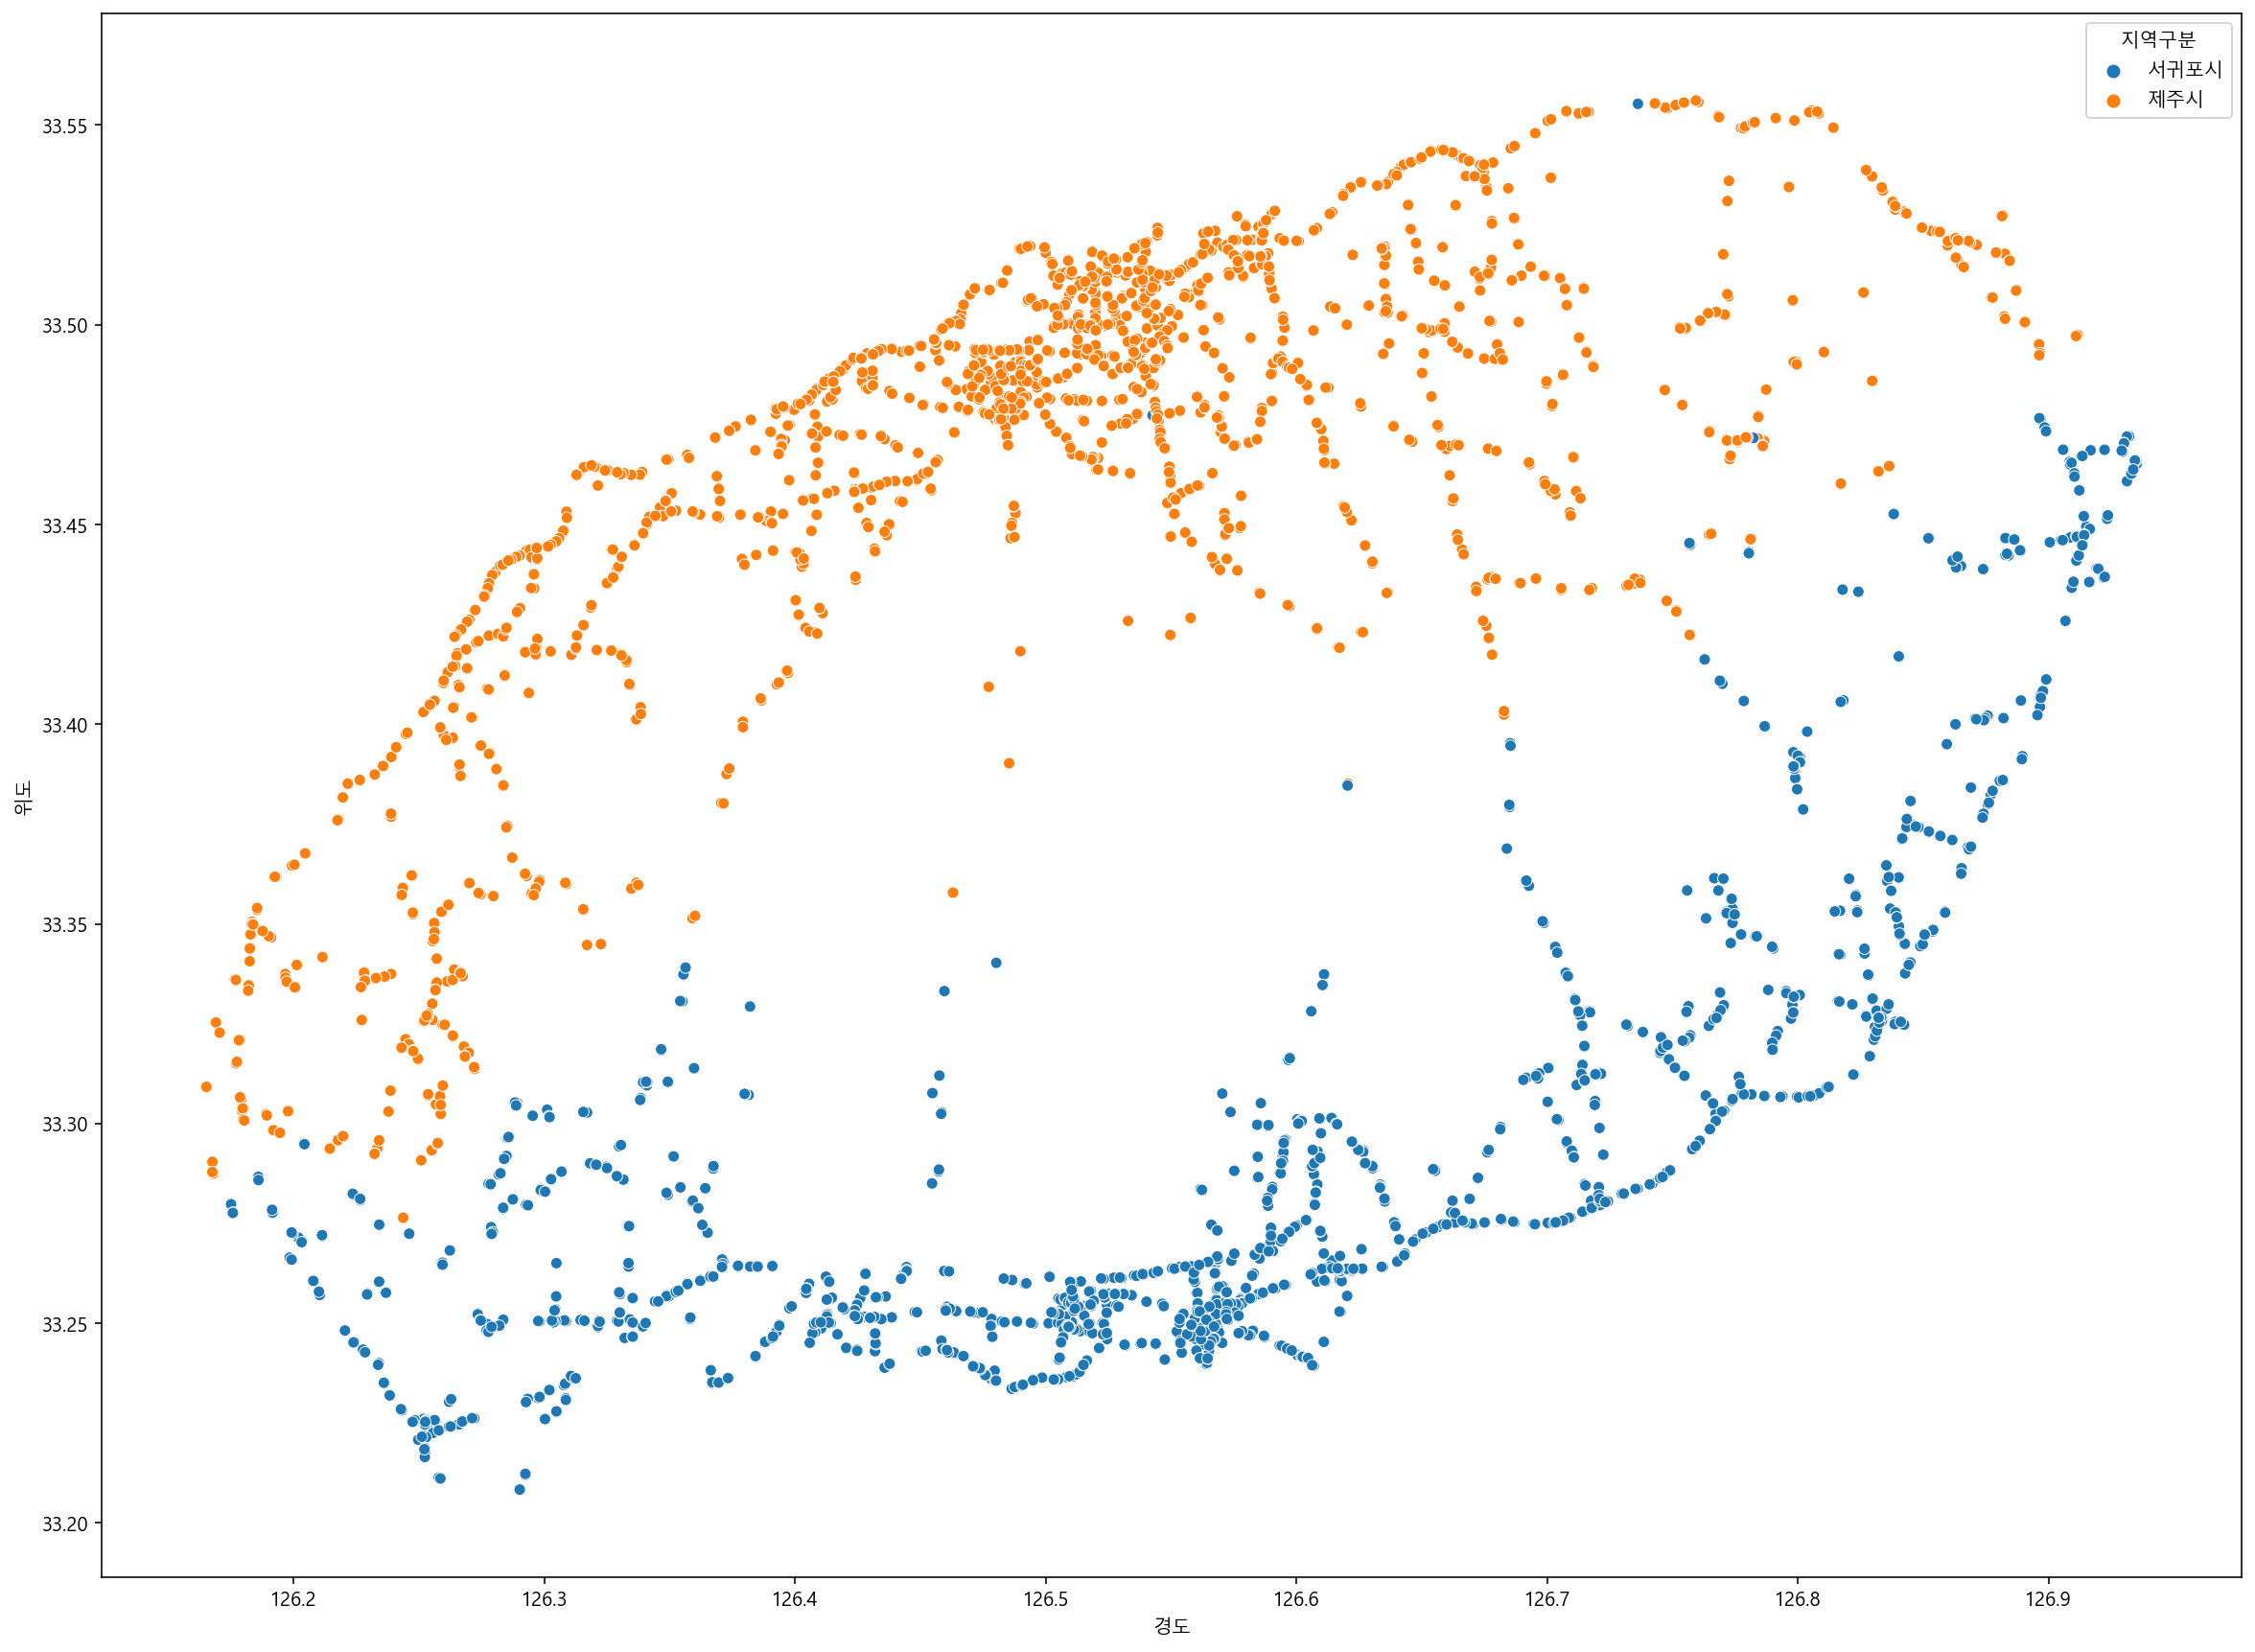

In [14]:
plt.figure(figsize=(20, 15))
sns.scatterplot(
    data=df1,
    x="경도",
    y="위도",
    hue="지역구분"
)

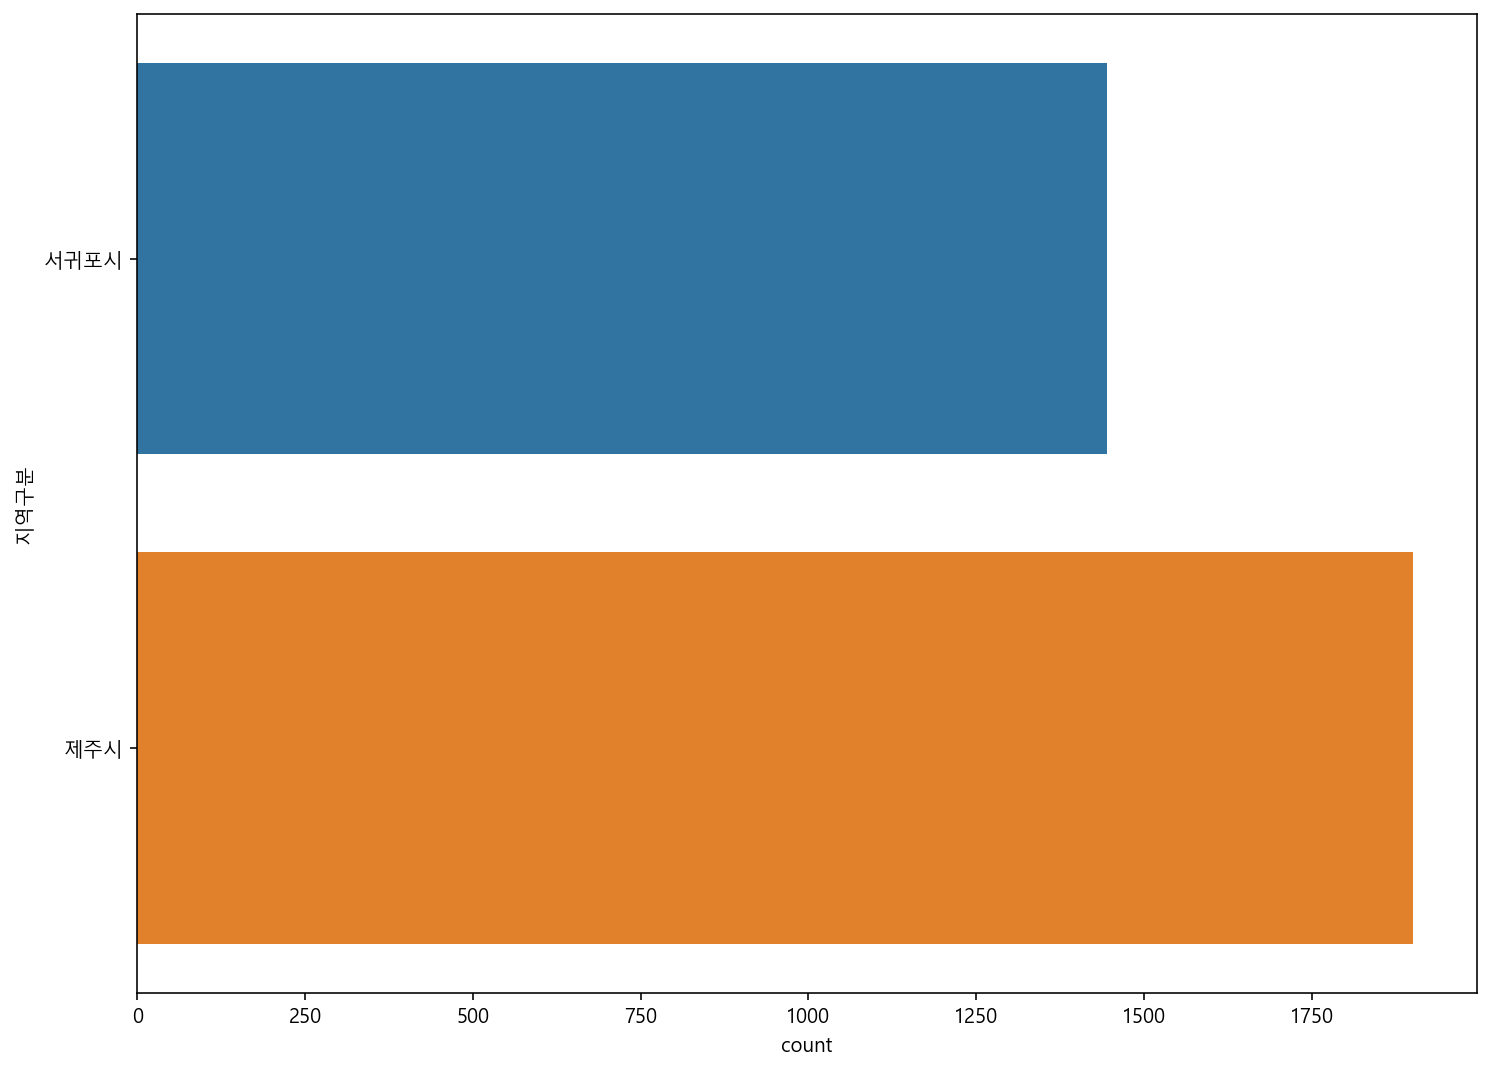

In [15]:
plt.figure(figsize=(12, 9))
sns.countplot(data=df1, y="지역구분")

### Countplot으로 나타낸 결과 제주시에 정류장이 더 많은 것을 확인할 수 있다.